# Daniel Lupercio HW4 11/9/21

## 9. This problem involves the OJ data set which is part of the ISLR2 package.

## (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [1]:
%load_ext autoreload
%autoreload 2
import sys

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tree plotting
import pydot
from IPython.display import Image
import graphviz 
#from sklearn.externals.six import StringIO  
from io import StringIO  

# Model selection
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
oj_df = pd.read_csv("/Users/daniel421/Desktop/STAT_724/ISLR_data/OJ.csv", index_col = 0)

In [4]:
oj_df.head()
#oj_df.count()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


Let us turn the "Store7" field to a categorical variable. 

In [5]:
oj_df['Store7'] = oj_df['Store7'].map({'Yes':1, "No":0})
oj_df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [6]:
#train_test_split?

In [7]:
X_train, X_test, y_train, y_test = train_test_split(oj_df.drop(['Purchase'], axis = 1), oj_df[['Purchase']], train_size = 800)

## (b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [33]:
#=== This function creates images of tree models using 'pydot' & 'export_graphviz'
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return (graph)

#=== Prints binary rules for a decision tree
# from: # https://scikit-learn.org/dev/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
def tree_structure(clf):

    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    k = 0

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack` so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has {n} nodes and has "
          "the following tree structure:\n".format(n=n_nodes)) 
    for i in range(n_nodes):
        if is_leaves[i]:
            print("{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i))
            k += 1
        else:
            print("{space}node={node} is a split node: "
                  "go to node {left} if X[:, {feature}] <= {threshold} "
                  "else to node {right}.".format(
                      space=node_depth[i] * "\t",
                      node=i,
                      left=children_left[i],
                      feature=feature[i],
                      threshold=threshold[i],
                      right=children_right[i]))
    return k

In [35]:
classifier = DecisionTreeClassifier(random_state = 0, min_samples_split = 100)
classifier_fit = classifier.fit(X_train, y_train)
print("The training error rate is: ", str(1-accuracy_score(classifier.predict(X_train), y_train)))

The training error rate is:  0.17000000000000004


In [10]:
import sklearn.tree as tree
# tree.plot_tree(classifier)


In [29]:
print("Number of Leaves = ",classifier_fit.tree_.node_count)

Number of Leaves =  31


In [11]:
pred_test = classifier.predict(X_test)

print("accuracy: %0.3f" % accuracy_score(y_test, pred_test))

accuracy: 0.852


In [12]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

          CH       0.88      0.88      0.88       165
          MM       0.81      0.81      0.81       105

    accuracy                           0.85       270
   macro avg       0.84      0.84      0.84       270
weighted avg       0.85      0.85      0.85       270



## (c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

In [38]:
#tree.plot_tree(classifier) 
k = tree_structure(classifier)
k

The binary tree structure has 31 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 8] <= 0.48293499648571014 else to node 12.
	node=1 is a split node: go to node 2 if X[:, 8] <= 0.1566310003399849 else to node 7.
		node=2 is a split node: go to node 3 if X[:, 16] <= 3.5 else to node 6.
			node=3 is a split node: go to node 4 if X[:, 9] <= 1.7350000143051147 else to node 5.
				node=4 is a leaf node.
				node=5 is a leaf node.
			node=6 is a leaf node.
		node=7 is a split node: go to node 8 if X[:, 11] <= 0.19500000029802322 else to node 9.
			node=8 is a leaf node.
			node=9 is a split node: go to node 10 if X[:, 0] <= 247.5 else to node 11.
				node=10 is a leaf node.
				node=11 is a leaf node.
	node=12 is a split node: go to node 13 if X[:, 8] <= 0.7056989967823029 else to node 18.
		node=13 is a split node: go to node 14 if X[:, 11] <= 0.26500000059604645 else to node 17.
			node=14 is a split node: go to node 15 if X[:, 15] <= 0.234999999403

16

## (d) Create a plot of the tree, and interpret the results.

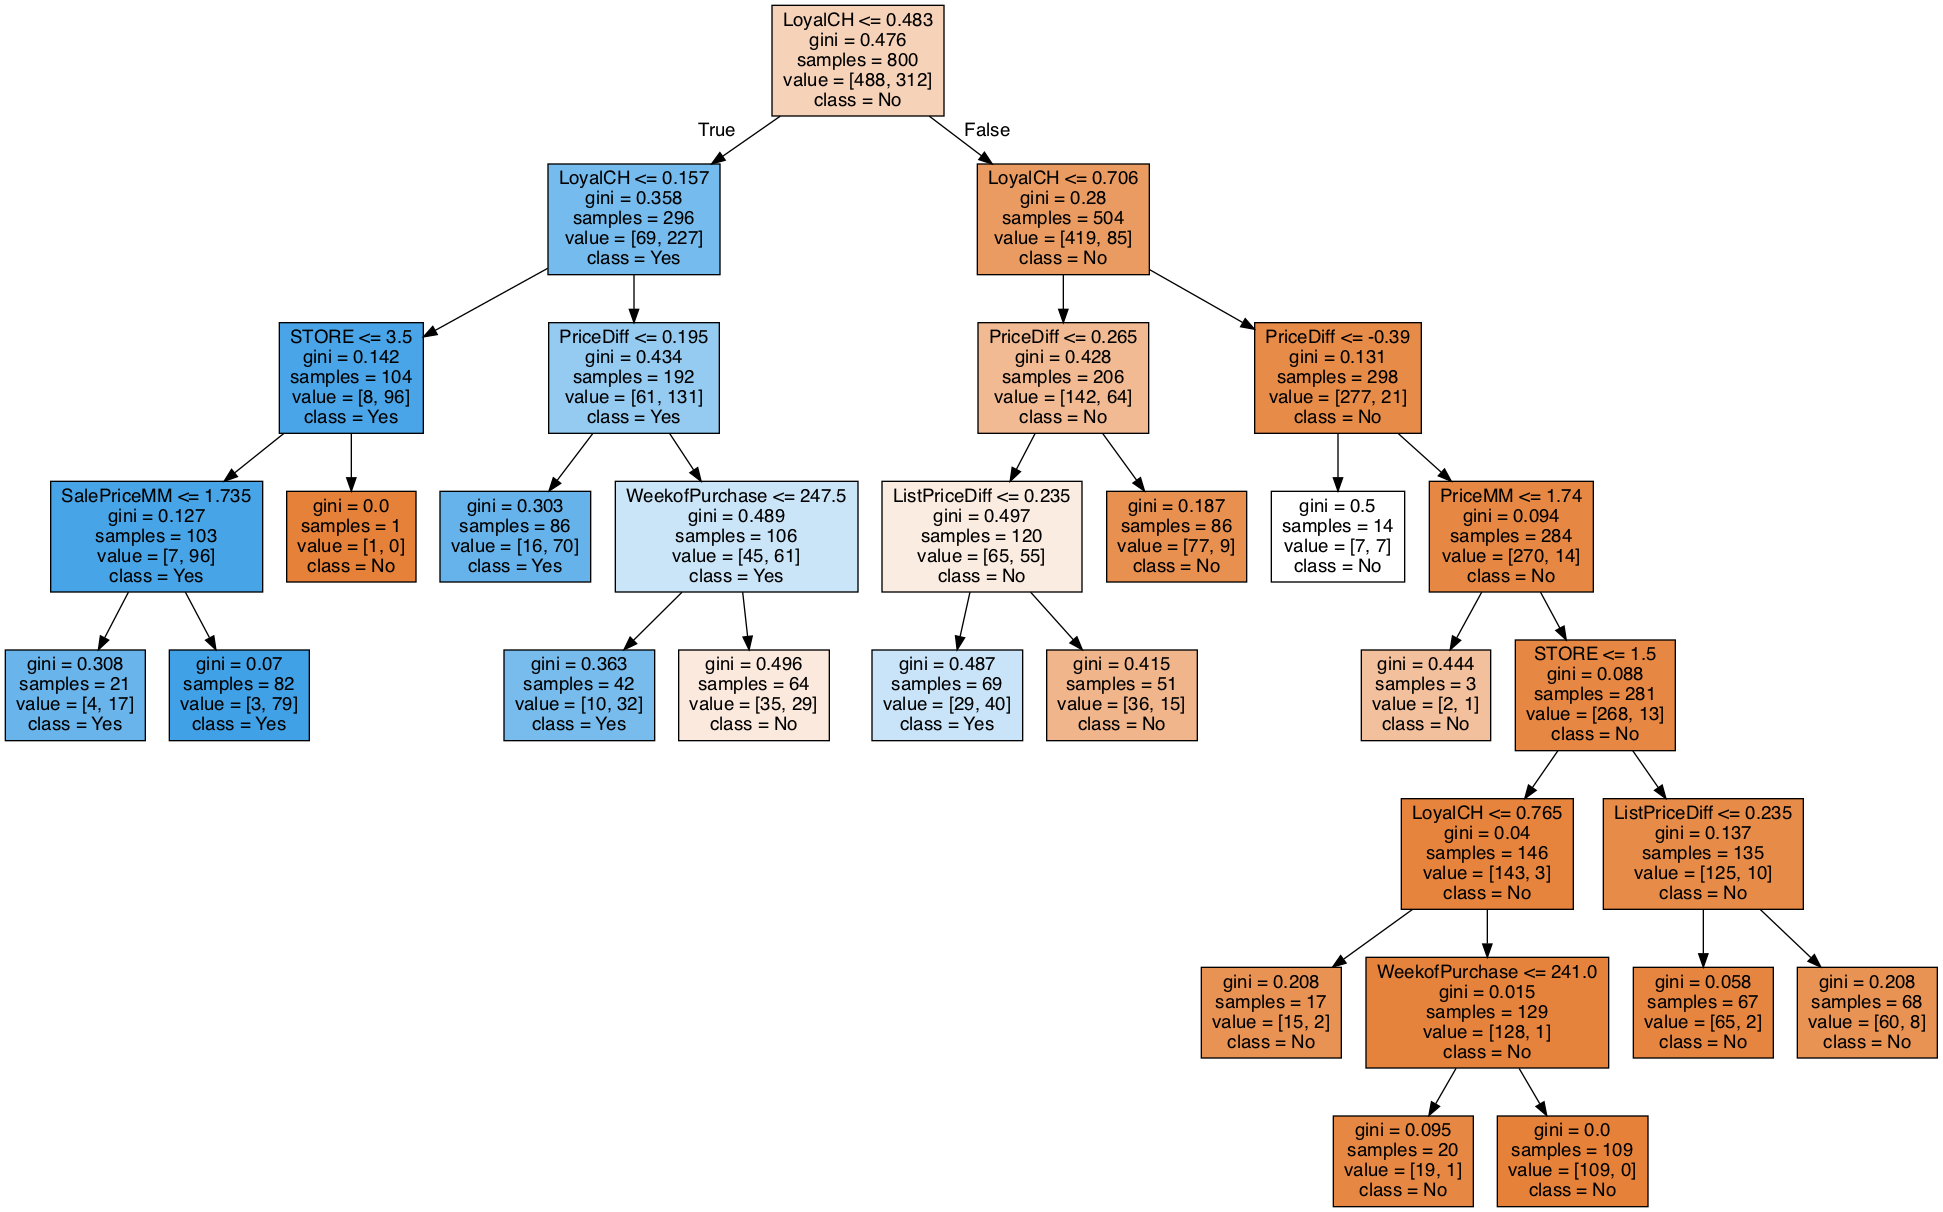

In [14]:
graph, = print_tree(classifier, features = X_train.columns, class_names=['No', 'Yes']) 
Image(graph.create_png())

## (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [15]:
cm = pd.DataFrame(confusion_matrix(y_test, pred_test).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,145,20
Yes,20,85


In [16]:
print("The testing error rate is: ", (str(1-accuracy_score(classifier.predict(X_test), y_test))))

The testing error rate is:  0.14814814814814814


## (f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

classification_error_rate_scorer = make_scorer(accuracy_score)
parameters = {'max_depth':range(1,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), parameters, n_jobs=4, cv=10,
                  scoring=classification_error_rate_scorer)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8075000000000001 {'max_depth': 1}


The optimal tree depth is 1. This result is the same when the range widened to 30.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

classification_error_rate_scorer = make_scorer(accuracy_score)
parameters = {'max_depth':range(1,30)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), parameters, n_jobs=4, cv=10,
                  scoring=classification_error_rate_scorer)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8075000000000001 {'max_depth': 1}


## (g)

## (h) Which tree size corresponds to the lowest cross-validated classification error rate?

## (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

## (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

## (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?